In [47]:
# Pre Req Imports
import pandas as pd
import io
import os
import csv
import numpy as np
import requests
import json
import matplotlib.pyplot as plt # for plotting graphs

# Import API key
from config import api_key

# Define Excel Sheets

In [48]:
# Crime
# Table 3 is the largest and has the most useful data, crimes by type per suburb/town/postcode for each year from 2013 to 2022
xlsx = pd.ExcelFile("Data_Tables_LGA_Recorded_Offences_Year_Ending_December_2022.xlsx")
# Crime_By_Police_Region_Pop = pd.read_excel(xlsx, "Table 01") # Offences recorded and rate per 100,000 population by police region and local government area - January 2013 to December 2022
# Crime_By_Offence_Type_Pop = pd.read_excel(xlsx, "Table 02") # Offences recorded and rate per 100,000 population by offence type, local government area and police service area - January 2013 to December 2022
Crime_By_Offence_Type = pd.read_excel(xlsx, "Table 03") # Offences recorded by offence type, local government area and postcode or suburb/town - January 2013 to December 2022
# Crime_By_Location_Area = pd.read_excel(xlsx, "Table 04") # Offences recorded by location type and local government area - January 2013 to December 2022
# Crime_By_Investigation_Status = pd.read_excel(xlsx, "Table 05") # Offences recorded by investigation status and local government area - January 2013 to December 2022
# Crime_By_Drugs = pd.read_excel(xlsx, "Table 06") # Select drug offences by drug type and local government area - January 2013 to December 2022

In [49]:
# View the crimes dataframe 
Crime_By_Offence_Type.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,2022,December,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,2
1,2022,December,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B42 Steal from a motor vehicle,1
2,2022,December,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B49 Other theft,1
3,2022,December,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,1
4,2022,December,Alpine,3691,Dederang,D Public order and security offences,D20 Disorderly and offensive conduct,D22 Drunk and disorderly in public,1


In [50]:
# Obtain count of unique values in each column of crime table
for col in Crime_By_Offence_Type.columns:
    crime_unique_values = Crime_By_Offence_Type[col].nunique()
    print(col, crime_unique_values)

Year 10
Year ending 1
Local Government Area 79
Postcode 693
Suburb/Town Name 2851
Offence Division 6
Offence Subdivision 25
Offence Subgroup 106
Offence Count 739


In [51]:
# Groupby 'Year', 'suburb', 'division' and 'subdivision', summing 'offence count', dropping 'Year end' and 'offence subgroup'
crime_year_burb_div_sdiv = Crime_By_Offence_Type.groupby(["Year","Local Government Area", "Postcode", "Suburb/Town Name","Offence Division", "Offence Subdivision"])["Offence Count"].sum().reset_index().sort_values(by=["Year", "Suburb/Town Name", "Offence Subdivision"])
crime_year_burb_div_sdiv.to_csv("Resources/crime_year_burb_div_sdiv.csv", index=False)
crime_year_burb_div_sdiv.head()

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count
16123,2013,Yarra,3067,Abbotsford,A Crimes against the person,A20 Assault and related offences,40
16124,2013,Yarra,3067,Abbotsford,A Crimes against the person,A50 Robbery,4
16125,2013,Yarra,3067,Abbotsford,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",6
16126,2013,Yarra,3067,Abbotsford,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,7
16128,2013,Yarra,3067,Abbotsford,B Property and deception offences,B10 Arson,3


In [52]:
# Obtain count of unique values in each column of cleaned crime table
for col in crime_year_burb_div_sdiv.columns:
    crime_unique_values = crime_year_burb_div_sdiv[col].nunique()
    print(col, crime_unique_values)

Year 10
Local Government Area 79
Postcode 693
Suburb/Town Name 2851
Offence Division 6
Offence Subdivision 25
Offence Count 1151


In [53]:
# Property
xls = pd.ExcelFile("CleanSuburb_HouseV2021A.xls")
Property_Data = pd.read_excel(xls)

In [54]:
#View the property dataframe. Can drop 'Median 2011' and 'Median 2012' as no crime data for these years. 'Change' and 'Growth' columns can be dropped as not relevant to study questions.
Property_Data.head()

,locality,Median 2011,Median 2012,Median 2013,Median 2014,Median 2015,Median 2016,Median 2017,Median 2018,Median 2019,Median 2020,Median 2021,Median 2022,Change 2020-2021,Change 2011-2021,Growth PA
0,ABBOTSFORD,730000,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1375000,1517500.0,15.0,88.0,6.5
1,ABERFELDIE,994000,852500,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1880500,1575000.0,24.0,89.0,6.6
2,AINTREE,-,-,-,-,600000,600000,571000,557500,575000,640000,719000,760000.0,12.0,NaN,NaN
3,AIREYS INLET,680000,634000,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1750000.0,57.0,161.0,10.1
4,AIRPORT WEST,557500,495000,532000,575000,635000,742000,845000,845000,795000,812500,960000,919500.0,18.0,72.0,5.6


In [55]:
# Convert 'locality' to title case in order to merge with 'Suberb/Town Name'
Property_Data['locality'] = Property_Data['locality'].astype(str).str.title()
Property_Data.head()

,locality,Median 2011,Median 2012,Median 2013,Median 2014,Median 2015,Median 2016,Median 2017,Median 2018,Median 2019,Median 2020,Median 2021,Median 2022,Change 2020-2021,Change 2011-2021,Growth PA
0,Abbotsford,730000,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1375000,1517500.0,15.0,88.0,6.5
1,Aberfeldie,994000,852500,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1880500,1575000.0,24.0,89.0,6.6
2,Aintree,-,-,-,-,600000,600000,571000,557500,575000,640000,719000,760000.0,12.0,NaN,NaN
3,Aireys Inlet,680000,634000,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1750000.0,57.0,161.0,10.1
4,Airport West,557500,495000,532000,575000,635000,742000,845000,845000,795000,812500,960000,919500.0,18.0,72.0,5.6


In [56]:
# Delete columns for 2011 and 2012 plus the Change and Growth columns
Property_Data.drop(['Median 2011', 'Median 2012', 'Change 2020-2021', 'Change 2011-2021', 'Growth PA'], axis = 1, inplace=True)
Property_Data.head()

,locality,Median 2013,Median 2014,Median 2015,Median 2016,Median 2017,Median 2018,Median 2019,Median 2020,Median 2021,Median 2022
0,Abbotsford,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1375000,1517500.0
1,Aberfeldie,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1880500,1575000.0
2,Aintree,-,-,600000,600000,571000,557500,575000,640000,719000,760000.0
3,Aireys Inlet,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1750000.0
4,Airport West,532000,575000,635000,742000,845000,845000,795000,812500,960000,919500.0


In [57]:
# Convert all the Median house price columns to float datatype, or NaN if the value is a string
Property_Data[['Median 2013', 'Median 2014', 'Median 2015', 'Median 2016', 'Median 2017', 'Median 2018', 'Median 2019', 'Median 2020', 'Median 2021', 'Median 2022']] \
    = Property_Data[['Median 2013', 'Median 2014', 'Median 2015', 'Median 2016', 'Median 2017', 'Median 2018', 'Median 2019', 'Median 2020', 'Median 2021', 'Median 2022']] \
    .apply(pd.to_numeric, errors='coerce', downcast='float')
Property_Data.dtypes

locality        object
Median 2013    float32
Median 2014    float32
Median 2015    float32
Median 2016    float32
Median 2017    float32
Median 2018    float32
Median 2019    float32
Median 2020    float32
Median 2021    float32
Median 2022    float32
dtype: object

In [58]:
# Use AusPost postcode search to add Postcode to Property_Data
base_url = "https://digitalapi.auspost.com.au/postcode/search.json"
headers = {"auth-key": api_key}

# Make a copy of Property_Data
Property_Data_Postcodes = Property_Data.copy()
# Empty list to hold postcodes
postcodes = []

# Loop through Property_Data
for index, row in Property_Data_Postcodes.iterrows():
    locality = Property_Data_Postcodes.loc[index, 'locality']

    # Define parameters with 'locality', VIC, no postboxes
    params = {"q": locality, "state": "VIC", "excludePostBoxFlag": "true"}

    # Show search going on
    print(f"Looking up {locality}...")
    try:
        # Make the API request
        response = requests.get(base_url, headers=headers, params=params).json()
        
        # Result can be a list of dictionaries or just a single dictionary, depending on whether 'locality' is unique
        result = response["localities"]["locality"]
        
        if isinstance(result, list):
            # If result is a list, extract postcode from first dictionary
            postcode = result[0]["postcode"]
        else:
            # Otherwise extract postcode from unique dictionary
            postcode = result["postcode"]
    except:
        #If locality not found return 'Unknown'
        postcode = "Unknown"
    # Store returned postcodes in list
    postcodes.append(postcode)
    # Show result of search
    print(f"...found postcode {postcode}")

# Add finished postcode list to Properta_Data after locality column   
Property_Data_Postcodes.insert(1, "Postcode", postcodes)
# Write to csv
Property_Data_Postcodes.to_csv('Resources/Property_Data_Postcodes.csv')
Property_Data_Postcodes.head()

Looking up Abbotsford...
...found postcode 3067
Looking up Aberfeldie...
...found postcode 3040
Looking up Aintree...
...found postcode 3336
Looking up Aireys Inlet...
...found postcode 3231
Looking up Airport West...
...found postcode 3042
Looking up Albanvale...
...found postcode 3021
Looking up Albert Park...
...found postcode 3206
Looking up Albion...
...found postcode 3020
Looking up Alexandra...
...found postcode 3714
Looking up Alfredton...
...found postcode 3350
Looking up Allansford...
...found postcode 3277
Looking up Alphington...
...found postcode 3078
Looking up Altona...
...found postcode 3018
Looking up Altona East...
...found postcode 3025
Looking up Altona Meadows...
...found postcode 3028
Looking up Altona North...
...found postcode 3025
Looking up Anglesea...
...found postcode 3230
Looking up Apollo Bay...
...found postcode 3233
Looking up Ararat...
...found postcode 3377
Looking up Ardeer...
...found postcode 3022
Looking up Armadale...
...found postcode 3143
Lookin

,locality,Postcode,Median 2013,Median 2014,Median 2015,Median 2016,Median 2017,Median 2018,Median 2019,Median 2020,Median 2021,Median 2022
0,Abbotsford,3067,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1375000.0,1517500.0
1,Aberfeldie,3040,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1880500.0,1575000.0
2,Aintree,3336,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,640000.0,719000.0,760000.0
3,Aireys Inlet,3231,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1750000.0
4,Airport West,3042,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,960000.0,919500.0


In [59]:
# Melt the property table to match crime table format
melted_property_data_postcode = Property_Data_Postcodes.melt(id_vars=['locality', 'Postcode'], var_name='year', value_name='Median')

# Extract year from column name and convert to integer
melted_property_data_postcode['year'] = melted_property_data_postcode['year'].str.extract('(\d+)').astype(int)

# Sort the dataframe by locality and year
melted_property_data_postcode = melted_property_data_postcode.sort_values(['locality', 'year'])

# Reset index
melted_property_data_postcode = melted_property_data_postcode.reset_index(drop=True)

print(melted_property_data_postcode.head())

     locality Postcode  year     Median
0  Abbotsford     3067  2013   792500.0
1  Abbotsford     3067  2014   862500.0
2  Abbotsford     3067  2015   925000.0
3  Abbotsford     3067  2016  1187500.0
4  Abbotsford     3067  2017  1280000.0


In [60]:
# Use 'Suburb/Town Name' and 'localities' to merge cleaned Crime and Property dataframes using an inner join.
crime_property_merged = pd.merge(crime_year_burb_div_sdiv, melted_property_data_postcode, left_on=["Year", "Suburb/Town Name"], right_on = ["year", "locality"], how = 'inner')
crime_property_merged.head(10)


,Year,Local Government Area,Postcode_x,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,locality,Postcode_y,year,Median
0,2013,Yarra,3067,Abbotsford,A Crimes against the person,A20 Assault and related offences,40,Abbotsford,3067,2013,792500.0
1,2013,Yarra,3067,Abbotsford,A Crimes against the person,A50 Robbery,4,Abbotsford,3067,2013,792500.0
2,2013,Yarra,3067,Abbotsford,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",6,Abbotsford,3067,2013,792500.0
3,2013,Yarra,3067,Abbotsford,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,7,Abbotsford,3067,2013,792500.0
4,2013,Yarra,3067,Abbotsford,B Property and deception offences,B10 Arson,3,Abbotsford,3067,2013,792500.0
5,2013,Yarra,3067,Abbotsford,B Property and deception offences,B20 Property damage,75,Abbotsford,3067,2013,792500.0
6,2013,Yarra,3067,Abbotsford,B Property and deception offences,B30 Burglary/Break and enter,127,Abbotsford,3067,2013,792500.0
7,2013,Yarra,3067,Abbotsford,B Property and deception offences,B40 Theft,359,Abbotsford,3067,2013,792500.0
8,2013,Yarra,3067,Abbotsford,B Property and deception offences,B50 Deception,166,Abbotsford,3067,2013,792500.0
9,2013,Yarra,3067,Abbotsford,C Drug offences,C10 Drug dealing and trafficking,18,Abbotsford,3067,2013,792500.0


In [61]:
# Create six different crime_property_merge csv files from the main merge file above, each one named for, and only containing rows corresponding to one of the six 'Offence Division's
offence_div = crime_property_merged['Offence Division'].unique()
for div in offence_div:
    crime_div_property_merged = crime_property_merged[crime_property_merged['Offence Division'] == div]
    crime_div_property_merged.to_csv(f'Resources/{div}.csv', index=False)

# Merged Data
The `Resources` folder contains the following working csv files:
- `A Crimes against the person.csv`
- `B Property and deception offences.csv`
- `C Drug offences.csv`
- `D Public order and security offences.csv`
- `E Justice procedures offences.csv`
- `F Other offences.csv`

Each is a merge of cleaned crimes inner joined to cleaned property by matching suburb name.

In [62]:
assault_data = crime_property_merged[crime_property_merged["Offence Subdivision"] == "A20 Assault and related offences"]
grouped_data = assault_data.groupby("Offence Count").count()
assault_data.head()

,Year,Local Government Area,Postcode_x,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,locality,Postcode_y,year,Median
0,2013,Yarra,3067,Abbotsford,A Crimes against the person,A20 Assault and related offences,40,Abbotsford,3067,2013,792500.0
18,2013,Moonee Valley,3040,Aberfeldie,A Crimes against the person,A20 Assault and related offences,11,Aberfeldie,3040,2013,947500.0
43,2013,Moonee Valley,3042,Airport West,A Crimes against the person,A20 Assault and related offences,41,Airport West,3042,2013,532000.0
61,2013,Brimbank,3021,Albanvale,A Crimes against the person,A20 Assault and related offences,42,Albanvale,3021,2013,313000.0
80,2013,Port Phillip,3206,Albert Park,A Crimes against the person,A20 Assault and related offences,26,Albert Park,3206,2013,1360000.0


In [63]:
summed_data = assault_data.groupby(["locality", "Year"])["Offence Count", "Median"].sum().reset_index()
summed_data = summed_data.rename(columns={"Offence Count": "Total Assault Offences", "locality": "Suburb"})
summed_data.head(20)

C:\Users\Roberto\AppData\Local\Temp\ipykernel_12604\1272632060.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summed_data = assault_data.groupby(["locality", "Year"])["Offence Count", "Median"].sum().reset_index()


,Suburb,Year,Total Assault Offences,Median
0,Abbotsford,2013,40,792500.0
1,Abbotsford,2014,49,862500.0
2,Abbotsford,2015,48,925000.0
3,Abbotsford,2016,72,1187500.0
4,Abbotsford,2017,79,1280000.0
5,Abbotsford,2018,61,1192500.0
6,Abbotsford,2019,98,1050000.0
7,Abbotsford,2020,82,1200000.0
8,Abbotsford,2021,90,1375000.0
9,Abbotsford,2022,100,1517500.0


In [64]:
# Data from the year 2013 only
summed_data_2013 = assault_data[assault_data["Year"] == 2013].groupby(["Year", "locality"])[["Offence Count", "Median"]].sum().reset_index()
summed_data_2013 = summed_data_2013.rename(columns={"Offence Count": "Total Assault Offences", "locality": "Suburb", "Median" : "Median Property Price ($)"})
Top20_Assault_data_2013 = summed_data_2013.sort_values(by="Total Assault Offences" , ascending=False).head(20)
# summed_data_2013.head(50)
Top20_Assault_data_2013

,Year,Suburb,Total Assault Offences,Median Property Price ($)
184,2013,Dandenong,607,405000.0
258,2013,Frankston,595,350000.0
591,2013,Shepparton,463,247000.0
432,2013,Mildura,423,225500.0
665,2013,Traralgon,407,269000.0
516,2013,Pakenham,392,335000.0
453,2013,Morwell,386,160000.0
550,2013,Reservoir,380,510000.0
618,2013,St Kilda,361,892000.0
613,2013,St Albans,351,350000.0


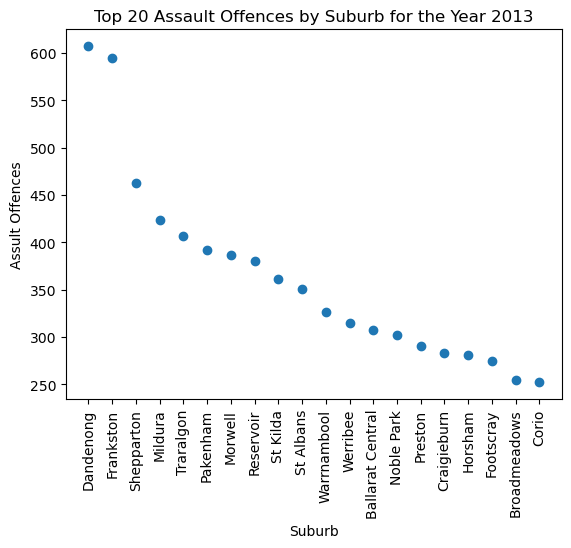

In [65]:
# Scatter Plot
plt.scatter(Top20_Assault_data_2013["Suburb"], Top20_Assault_data_2013["Total Assault Offences"])

plt.title("Top 20 Assault Offences by Suburb for the Year 2013")
plt.xlabel("Suburb")
plt.ylabel("Assult Offences")

plt.xticks(rotation=90)
plt.show()

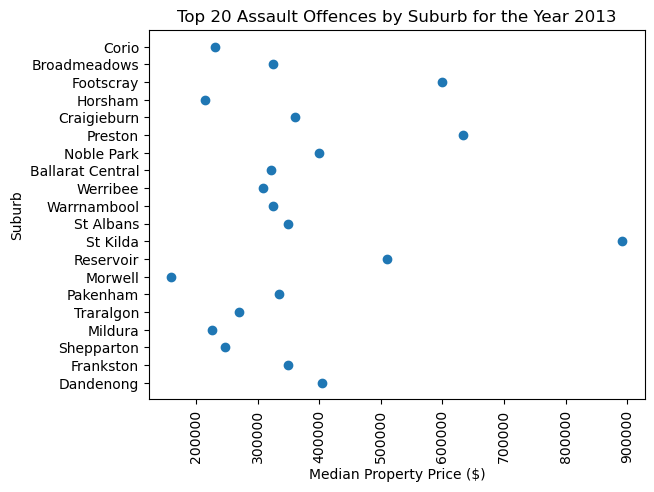

In [66]:
# Scatter Plot
plt.scatter(Top20_Assault_data_2013["Median Property Price ($)"], Top20_Assault_data_2013["Suburb"])

plt.title("Top 20 Assault Offences by Suburb for the Year 2013")
plt.ylabel("Suburb")
plt.xlabel("Median Property Price ($)")

plt.xticks(rotation=90)
plt.show()


# More Expensive the area the less crime on average

In [67]:
Bot20_Assault_data_2013 = summed_data_2013.sort_values(by="Total Assault Offences" , ascending=False).tail(20)
Bot20_Assault_data_2013

,Year,Suburb,Total Assault Offences,Median Property Price ($)
589,2013,Seville East,1,339500.0
593,2013,Shoreham,1,607000.0
203,2013,Donnybrook,1,0.0
633,2013,Sunset Strip,1,301500.0
383,2013,Lismore,1,110000.0
303,2013,Hepburn Springs,1,340000.0
632,2013,Sunderland Bay,1,324500.0
703,2013,Welshpool,1,166000.0
546,2013,Raymond Island,1,297500.0
594,2013,Skipton,1,155000.0


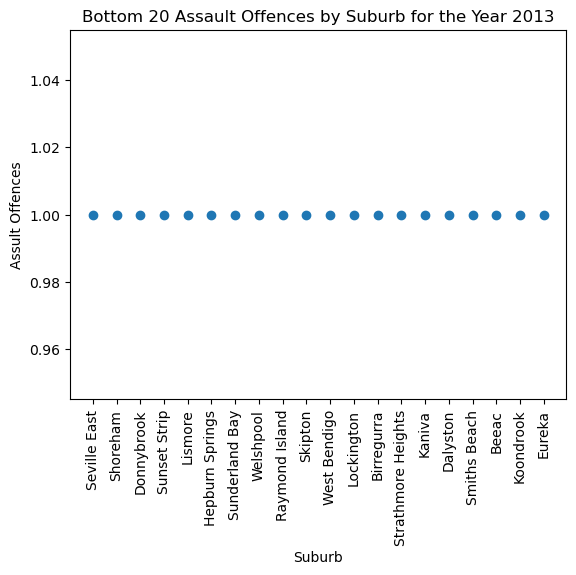

In [68]:
# Not useful
# Scatter Plot
plt.scatter(Bot20_Assault_data_2013["Suburb"], Bot20_Assault_data_2013["Total Assault Offences"])

plt.title("Bottom 20 Assault Offences by Suburb for the Year 2013")
plt.xlabel("Suburb")
plt.ylabel("Assult Offences")

plt.xticks(rotation=90)
plt.show()

# Visualisations for 2022

In [69]:
# Data from the year 2022 only
summed_data_2022 = assault_data[assault_data["Year"] == 2022].groupby(["Year", "locality"])[["Offence Count", "Median"]].sum().reset_index()
summed_data_2022 = summed_data_2022.rename(columns={"Offence Count": "Total Assault Offences", "locality": "Suburb", "Median" : "Median Property Price ($)"})
Top20_Assault_data_2022 = summed_data_2022.sort_values(by="Total Assault Offences" , ascending=False).head(20)
# summed_data_2013.head(50)
Top20_Assault_data_2022

,Year,Suburb,Total Assault Offences,Median Property Price ($)
188,2022,Dandenong,760,715000.0
260,2022,Frankston,596,779000.0
436,2022,Mildura,593,439500.0
711,2022,Werribee,547,620500.0
596,2022,Shepparton,519,405000.0
520,2022,Pakenham,443,655000.0
457,2022,Morwell,425,315000.0
624,2022,St Kilda,418,1515000.0
619,2022,St Albans,407,702500.0
672,2022,Traralgon,404,465000.0


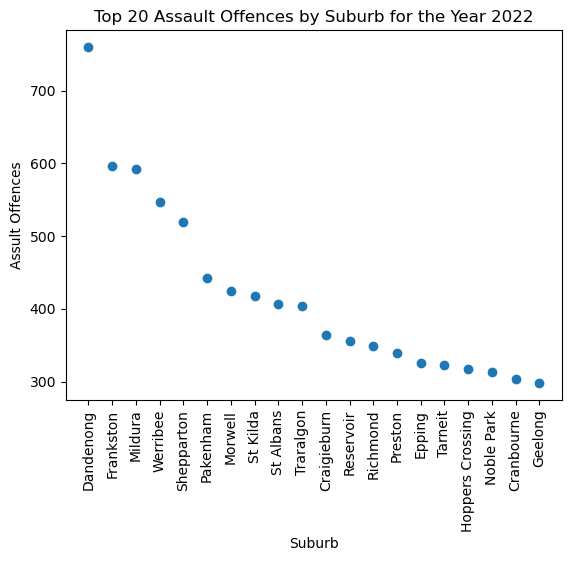

In [70]:
# Scatter Plot
plt.scatter(Top20_Assault_data_2022["Suburb"], Top20_Assault_data_2022["Total Assault Offences"])

plt.title("Top 20 Assault Offences by Suburb for the Year 2022")
plt.xlabel("Suburb")
plt.ylabel("Assult Offences")

plt.xticks(rotation=90)
plt.show()

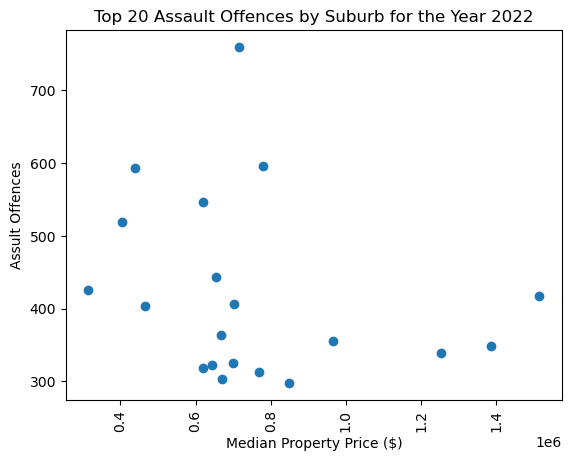

In [71]:
# Scatter Plot
plt.scatter(Top20_Assault_data_2022["Median Property Price ($)"], Top20_Assault_data_2022["Total Assault Offences"])

plt.title("Top 20 Assault Offences by Suburb for the Year 2022")
plt.xlabel("Median Property Price ($)")
plt.ylabel("Assult Offences")

plt.xticks(rotation=90)
plt.show()

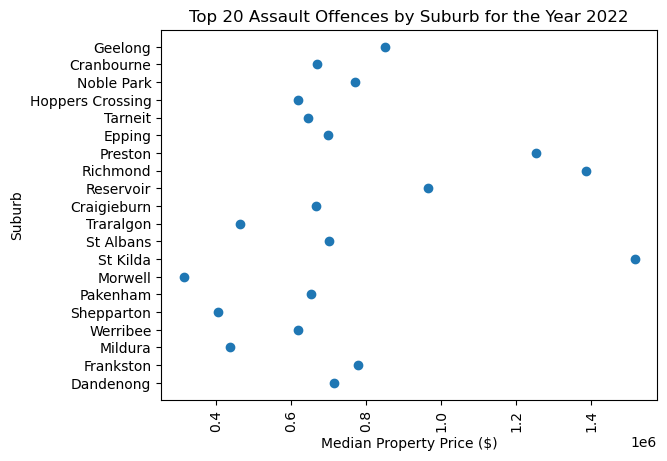

In [72]:
# Scatter Plot
plt.scatter(Top20_Assault_data_2022["Median Property Price ($)"], Top20_Assault_data_2022["Suburb"])

plt.title("Top 20 Assault Offences by Suburb for the Year 2022")
plt.ylabel("Suburb")
plt.xlabel("Median Property Price ($)")

plt.xticks(rotation=90)
plt.show()


# More Expensive the area the less crime on average

In [73]:
# Data from the year 2022 only
summed_data_2022 = assault_data[assault_data["Year"] == 2022].groupby(["Year", "locality"])[["Offence Count", "Median"]].sum().reset_index()
summed_data_2022 = summed_data_2022.rename(columns={"Offence Count": "Total Assault Offences", "locality": "Suburb", "Median" : "Median Property Price ($)"})
Bot20_Assault_data_2022 = summed_data_2022.sort_values(by="Total Assault Offences" , ascending=False).tail(20)
# summed_data_2013.head(50)
Bot20_Assault_data_2022

,Year,Suburb,Total Assault Offences,Median Property Price ($)
354,2022,Kilcunda,1,810000.0
658,2022,The Honeysuckles,1,502500.0
602,2022,Smiths Beach,1,976500.0
600,2022,Skipton,1,352500.0
324,2022,Invermay Park,1,725000.0
599,2022,Skenes Creek,1,850000.0
598,2022,Shoreham,1,1155000.0
470,2022,Murchison,1,410000.0
215,2022,Dunkeld,1,0.0
307,2022,Hepburn,1,675000.0


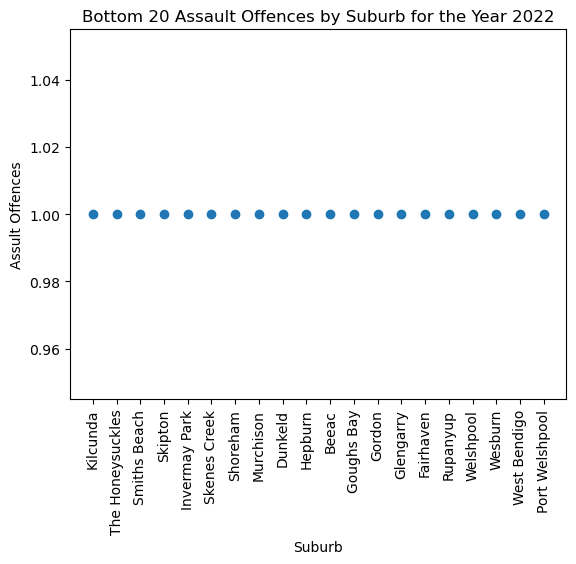

In [74]:
plt.scatter(Bot20_Assault_data_2022["Suburb"], Bot20_Assault_data_2022["Total Assault Offences"])

plt.title("Bottom 20 Assault Offences by Suburb for the Year 2022")
plt.xlabel("Suburb")
plt.ylabel("Assult Offences")

plt.xticks(rotation=90)
plt.show()

# Crime Data For Pie Chart

In [75]:
grouped_crime = crime_property_merged.groupby(['Suburb/Town Name','Offence Division']).sum()["Offence Count"].reset_index()
grouped_crime


C:\Users\Roberto\AppData\Local\Temp\ipykernel_12604\3185062204.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_crime = crime_property_merged.groupby(['Suburb/Town Name','Offence Division']).sum()["Offence Count"].reset_index()


,Suburb/Town Name,Offence Division,Offence Count
0,Abbotsford,A Crimes against the person,1235
1,Abbotsford,B Property and deception offences,9742
2,Abbotsford,C Drug offences,1090
3,Abbotsford,D Public order and security offences,799
4,Abbotsford,E Justice procedures offences,855
...,...,...,...
4628,Yinnar,B Property and deception offences,246
4629,Yinnar,C Drug offences,22
4630,Yinnar,D Public order and security offences,19
4631,Yinnar,E Justice procedures offences,95


In [76]:
suburb_offence_counts = grouped_crime.groupby("Suburb/Town Name")["Offence Count"].sum()
grouped_crime["Total Offence Count"] = grouped_crime["Suburb/Town Name"].map(suburb_offence_counts)
grouped_crime


,Suburb/Town Name,Offence Division,Offence Count,Total Offence Count
0,Abbotsford,A Crimes against the person,1235,13993
1,Abbotsford,B Property and deception offences,9742,13993
2,Abbotsford,C Drug offences,1090,13993
3,Abbotsford,D Public order and security offences,799,13993
4,Abbotsford,E Justice procedures offences,855,13993
...,...,...,...,...
4628,Yinnar,B Property and deception offences,246,463
4629,Yinnar,C Drug offences,22,463
4630,Yinnar,D Public order and security offences,19,463
4631,Yinnar,E Justice procedures offences,95,463


In [77]:
Top20_Crime_data = grouped_crime.sort_values(by="Total Offence Count" , ascending=False).head(30)
Top20_Crime_data

,Suburb/Town Name,Offence Division,Offence Count,Total Offence Count
1155,Dandenong,F Other offences,1678,75354
1150,Dandenong,A Crimes against the person,11680,75354
1154,Dandenong,E Justice procedures offences,15537,75354
1153,Dandenong,D Public order and security offences,7593,75354
1152,Dandenong,C Drug offences,5328,75354
1151,Dandenong,B Property and deception offences,33538,75354
1597,Frankston,B Property and deception offences,34677,74907
1598,Frankston,C Drug offences,4950,74907
1599,Frankston,D Public order and security offences,7591,74907
1600,Frankston,E Justice procedures offences,16164,74907


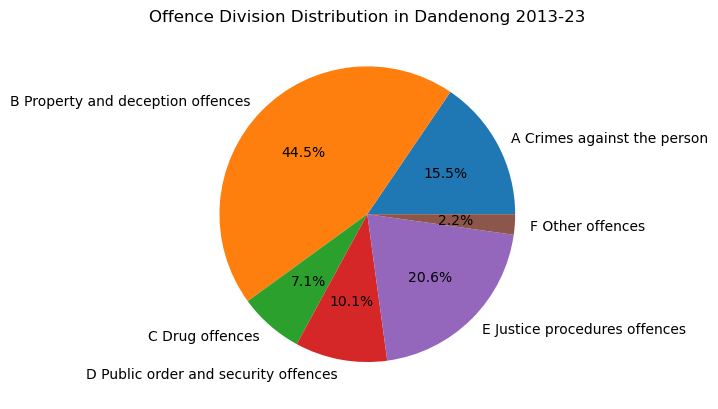

In [78]:
Dandenong_pie = grouped_crime[grouped_crime["Suburb/Town Name"] == "Dandenong"]    

# create a pie chart
plt.pie(Dandenong_pie["Offence Count"], labels=Dandenong_pie["Offence Division"], autopct='%1.1f%%')
plt.title("Offence Division Distribution in Dandenong 2013-23")

# display the chart
plt.show()

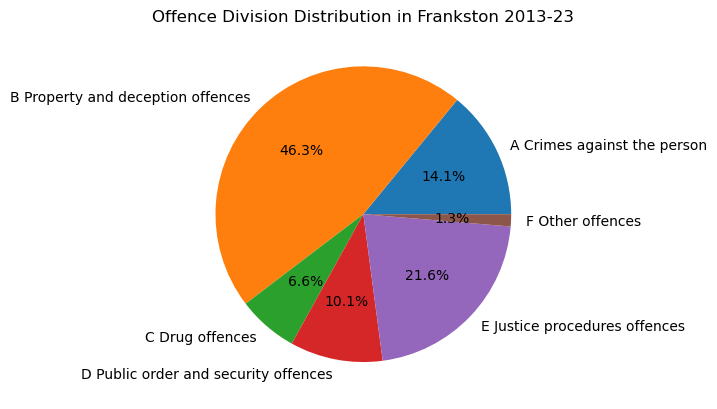

In [79]:
Frankston_pie = grouped_crime[grouped_crime["Suburb/Town Name"] == "Frankston"]    

# create a pie chart
plt.pie(Frankston_pie["Offence Count"], labels=Frankston_pie["Offence Division"], autopct='%1.1f%%')
plt.title("Offence Division Distribution in Frankston 2013-23")

# display the chart
plt.show()

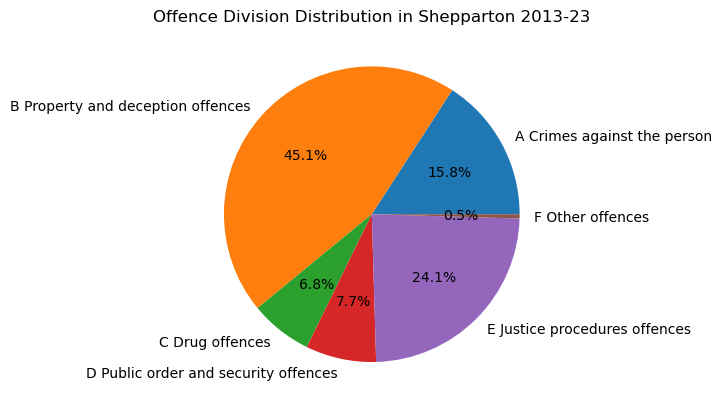

In [80]:
Shepparton_pie = grouped_crime[grouped_crime["Suburb/Town Name"] == "Shepparton"]    

# create a pie chart
plt.pie(Shepparton_pie["Offence Count"], labels=Shepparton_pie["Offence Division"], autopct='%1.1f%%')
plt.title("Offence Division Distribution in Shepparton 2013-23")

# display the chart
plt.show()

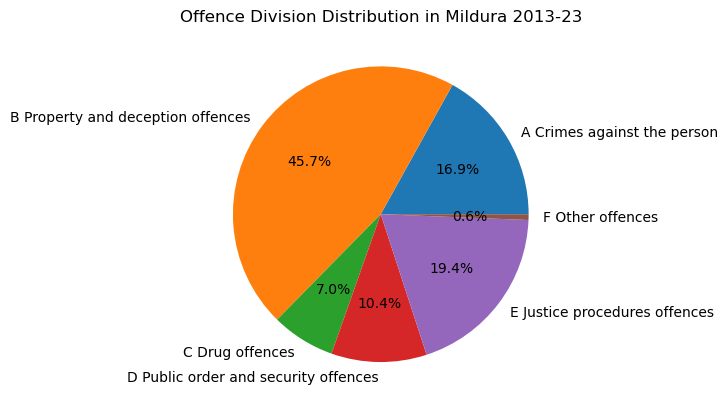

In [81]:
Mildura_pie = grouped_crime[grouped_crime["Suburb/Town Name"] == "Mildura"]    

# create a pie chart
plt.pie(Mildura_pie["Offence Count"], labels=Mildura_pie["Offence Division"], autopct='%1.1f%%')
plt.title("Offence Division Distribution in Mildura 2013-23")

# display the chart
plt.show()

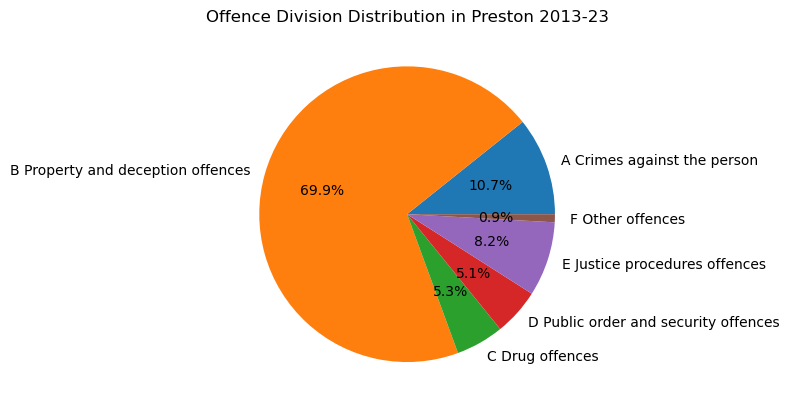

In [82]:
Preston_pie = grouped_crime[grouped_crime["Suburb/Town Name"] == "Preston"]    

# create a pie chart
plt.pie(Preston_pie["Offence Count"], labels=Preston_pie["Offence Division"], autopct='%1.1f%%')
plt.title("Offence Division Distribution in Preston 2013-23")

# display the chart
plt.show()

In [83]:
Bot20_Crime_data = grouped_crime.sort_values(by="Total Offence Count" , ascending=False).tail(30)
Bot20_Crime_data

,Suburb/Town Name,Offence Division,Offence Count,Total Offence Count
4021,Tawonga,B Property and deception offences,23,68
4020,Tawonga,A Crimes against the person,24,68
4022,Tawonga,C Drug offences,5,68
4027,Tawonga South,B Property and deception offences,30,64
4031,Tawonga South,F Other offences,1,64
4030,Tawonga South,E Justice procedures offences,4,64
4029,Tawonga South,D Public order and security offences,6,64
4028,Tawonga South,C Drug offences,3,64
4026,Tawonga South,A Crimes against the person,20,64
4074,The Honeysuckles,A Crimes against the person,10,64


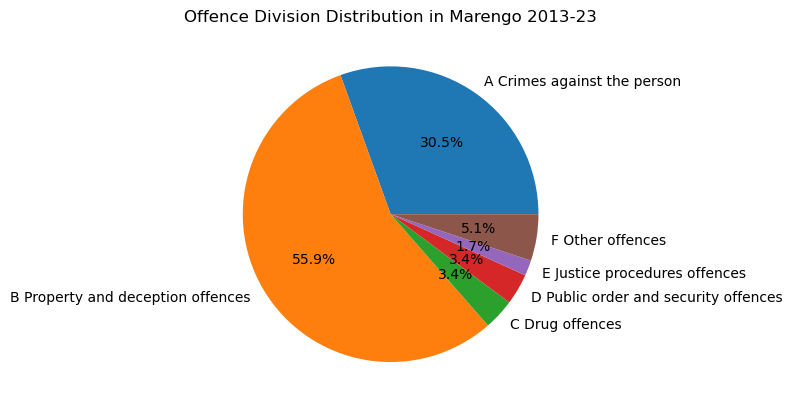

In [84]:
Marengo_pie = grouped_crime[grouped_crime["Suburb/Town Name"] == "Marengo"]    

# create a pie chart
plt.pie(Marengo_pie["Offence Count"], labels=Marengo_pie["Offence Division"], autopct='%1.1f%%')
plt.title("Offence Division Distribution in Marengo 2013-23")

# display the chart
plt.show()

# Bar Chart Cleaning

In [85]:
grouped_crime_v2 = crime_property_merged.groupby(['Suburb/Town Name','Offence Subdivision', 'Year']).sum()["Offence Count"].reset_index()
grouped_crime_v2

C:\Users\Roberto\AppData\Local\Temp\ipykernel_12604\4155946792.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_crime_v2 = crime_property_merged.groupby(['Suburb/Town Name','Offence Subdivision', 'Year']).sum()["Offence Count"].reset_index()


,Suburb/Town Name,Offence Subdivision,Year,Offence Count
0,Abbotsford,A20 Assault and related offences,2013,40
1,Abbotsford,A20 Assault and related offences,2014,49
2,Abbotsford,A20 Assault and related offences,2015,48
3,Abbotsford,A20 Assault and related offences,2016,72
4,Abbotsford,A20 Assault and related offences,2017,79
...,...,...,...,...
116454,Yinnar,F20 Transport regulation offences,2014,1
116455,Yinnar,Other crimes against the person,2015,2
116456,Yinnar,Other crimes against the person,2017,1
116457,Yinnar,Other crimes against the person,2020,9


In [86]:
grouped_crime_2022 = grouped_crime_v2[grouped_crime_v2['Year'] == 2022]
grouped_crime_2022

,Suburb/Town Name,Offence Subdivision,Year,Offence Count
9,Abbotsford,A20 Assault and related offences,2022,100
19,Abbotsford,A50 Robbery,2022,5
29,Abbotsford,"A70 Stalking, harassment and threatening behav...",2022,33
39,Abbotsford,A80 Dangerous and negligent acts endangering p...,2022,14
47,Abbotsford,B10 Arson,2022,2
...,...,...,...,...
116416,Yinnar,B40 Theft,2022,10
116424,Yinnar,B50 Deception,2022,3
116439,Yinnar,D30 Public nuisance offences,2022,1
116443,Yinnar,E10 Justice procedures,2022,1


In [87]:
suburb_offence_counts = grouped_crime.groupby("Suburb/Town Name")["Offence Count"].sum()
grouped_crime_2022["Total Offence Count"] = grouped_crime_2022["Suburb/Town Name"].map(suburb_offence_counts)
grouped_crime_2022

C:\Users\Roberto\AppData\Local\Temp\ipykernel_12604\66912776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_crime_2022["Total Offence Count"] = grouped_crime_2022["Suburb/Town Name"].map(suburb_offence_counts)


,Suburb/Town Name,Offence Subdivision,Year,Offence Count,Total Offence Count
9,Abbotsford,A20 Assault and related offences,2022,100,13993
19,Abbotsford,A50 Robbery,2022,5,13993
29,Abbotsford,"A70 Stalking, harassment and threatening behav...",2022,33,13993
39,Abbotsford,A80 Dangerous and negligent acts endangering p...,2022,14,13993
47,Abbotsford,B10 Arson,2022,2,13993
...,...,...,...,...,...
116416,Yinnar,B40 Theft,2022,10,463
116424,Yinnar,B50 Deception,2022,3,463
116439,Yinnar,D30 Public nuisance offences,2022,1,463
116443,Yinnar,E10 Justice procedures,2022,1,463


In [88]:
Top20_Crime_data = grouped_crime_2022.sort_values(by="Total Offence Count" , ascending=False).head(20)
Top20_Crime_data

,Suburb/Town Name,Offence Subdivision,Year,Offence Count,Total Offence Count
30167,Dandenong,F20 Transport regulation offences,2022,17,75354
30131,Dandenong,D30 Public nuisance offences,2022,53,75354
29989,Dandenong,A20 Assault and related offences,2022,760,75354
29999,Dandenong,A50 Robbery,2022,73,75354
30009,Dandenong,"A70 Stalking, harassment and threatening behav...",2022,180,75354
30019,Dandenong,A80 Dangerous and negligent acts endangering p...,2022,43,75354
30029,Dandenong,B10 Arson,2022,16,75354
30039,Dandenong,B20 Property damage,2022,538,75354
30049,Dandenong,B30 Burglary/Break and enter,2022,272,75354
30059,Dandenong,B40 Theft,2022,1748,75354


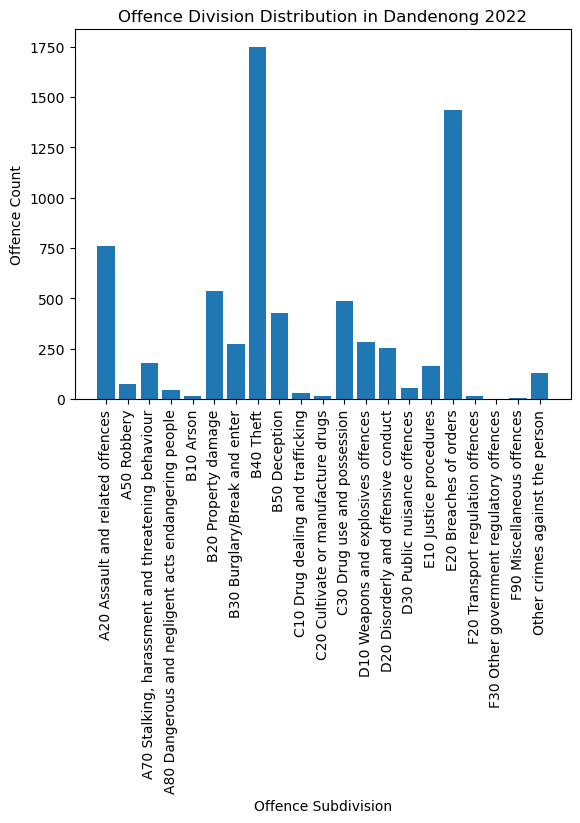

In [89]:
# select the data for a specific suburb
Dandenong_Bar = grouped_crime_2022[grouped_crime_2022["Suburb/Town Name"] == "Dandenong"]

# create a bar chart
plt.bar(Dandenong_Bar["Offence Subdivision"], Dandenong_Bar["Offence Count"])
plt.title("Offence Division Distribution in Dandenong 2022")
plt.xlabel("Offence Subdivision")
plt.ylabel("Offence Count")

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# display the chart
plt.show()


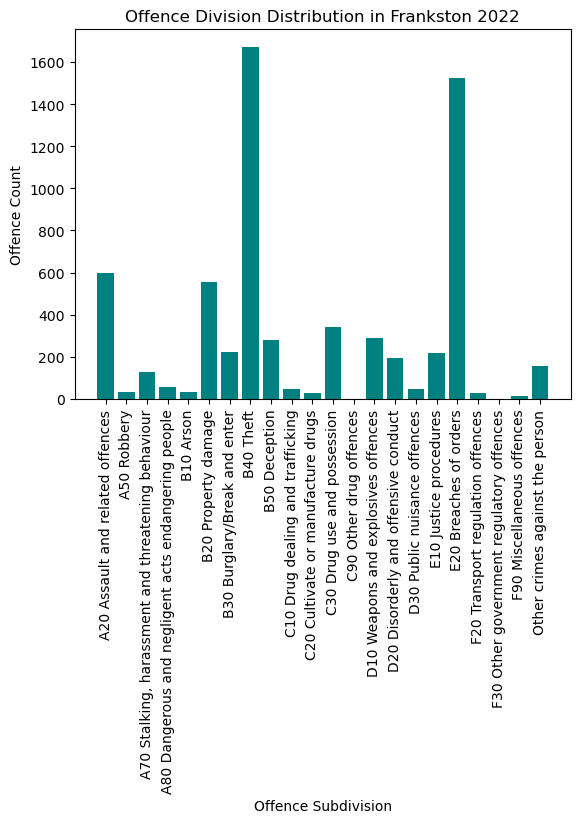

In [90]:
# select the data for a specific suburb
Frankston_Bar = grouped_crime_2022[grouped_crime_2022["Suburb/Town Name"] == "Frankston"]

# create a bar chart
plt.bar(Frankston_Bar["Offence Subdivision"], Frankston_Bar["Offence Count"], color="teal")
plt.title("Offence Division Distribution in Frankston 2022")
plt.xlabel("Offence Subdivision")
plt.ylabel("Offence Count")

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# display the chart
plt.show()


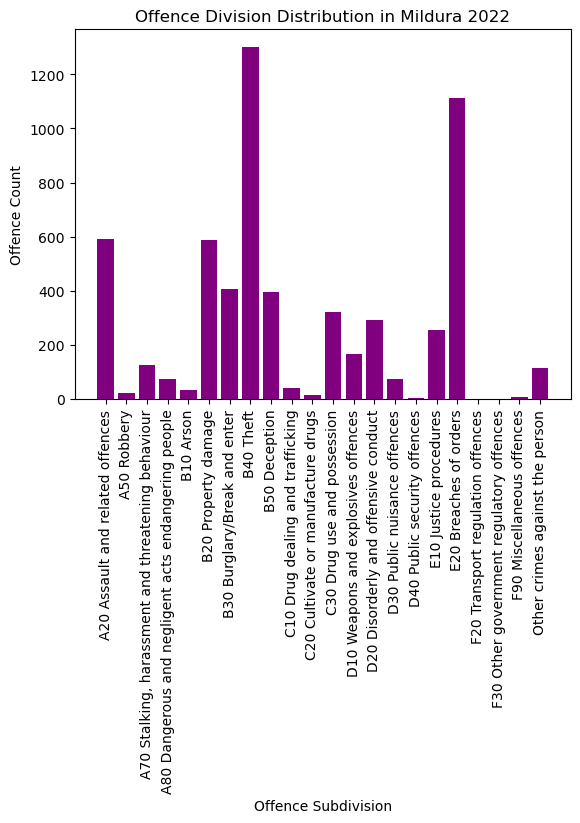

In [91]:
# select the data for a specific suburb
Mildura_Bar = grouped_crime_2022[grouped_crime_2022["Suburb/Town Name"] == "Mildura"]

# create a bar chart
plt.bar(Mildura_Bar["Offence Subdivision"], Mildura_Bar["Offence Count"], color="purple")
plt.title("Offence Division Distribution in Mildura 2022")
plt.xlabel("Offence Subdivision")
plt.ylabel("Offence Count")

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# display the chart
plt.show()


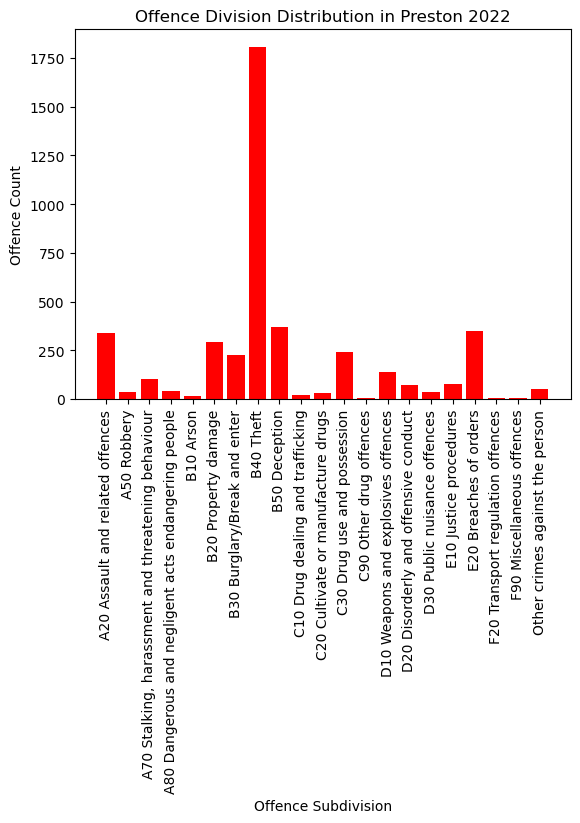

In [92]:
# select the data for a specific suburb
Preston_Bar = grouped_crime_2022[grouped_crime_2022["Suburb/Town Name"] == "Preston"]

# create a bar chart
plt.bar(Preston_Bar["Offence Subdivision"], Preston_Bar["Offence Count"], color="red")
plt.title("Offence Division Distribution in Preston 2022")
plt.xlabel("Offence Subdivision")
plt.ylabel("Offence Count")

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# display the chart
plt.show()
